# Introductory Analysis

In [1]:
%cd "C:\Users\gmcclelland\Desktop\Misc School Stuff\451_A1_Datasets"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import json
%matplotlib inline

C:\Users\gmcclelland\Desktop\Misc School Stuff\451_A1_Datasets


In [2]:
# get dataset
df = pd.read_csv('Transit Data - October.csv', parse_dates=['Date'])
df['Date'] = df['Date'].apply(lambda x: x.date())
df.dtypes

Date          object
Time          object
Class         object
Operation     object
Bus            int64
Route          int64
Latitude     float64
Longitude    float64
dtype: object

In [3]:
# clean values from malfunctioning gps antennae
# see how many records have longitude and latitude values of 0
zeros = df[df.Longitude == 0]
zeros = df[df.Latitude == 0]

In [4]:
# Cleaning data, including the removal of zeros

clean = df[df.Latitude > 44]
clean = clean[clean.Latitude < 45]
clean = clean[clean.Longitude > -77]
clean = clean[clean.Longitude < -76]
clean.head()

,Date,Time,Class,Operation,Bus,Route,Latitude,Longitude
0,2017-10-01,1/1/1900 1:43,QUEENS,Exact Fare,620,17,44.227860,-76.496938
1,2017-10-01,1/1/1900 1:43,QUEENS,Exact Fare,620,17,44.227860,-76.496938
2,2017-10-01,1/1/1900 1:58,ADULT,Pass (Multi-ride card),620,17,44.232035,-76.491397
3,2017-10-01,1/1/1900 1:58,QUEENS,Exact Fare,620,17,44.232035,-76.491397
4,2017-10-01,1/1/1900 1:58,QUEENS,Exact Fare,620,17,44.232035,-76.491397


In [5]:
unique = clean.groupby(['Latitude','Longitude']).size().reset_index(name="counts")
print(unique)

         Latitude  Longitude  counts
0       44.022887 -76.593688       1
1       44.085627 -76.569407       1
2       44.102697 -76.567988       1
3       44.117113 -76.589553       1
4       44.121085 -76.606583       1
...           ...        ...     ...
224868  44.279027 -76.471845       1
224869  44.279028 -76.471837       1
224870  44.279042 -76.471825       1
224871  44.279075 -76.471780       1
224872  44.279130 -76.467258       1

[224873 rows x 3 columns]


Here, we can find the number of passengers riding a bus by day, over the course of the provided October 2017 transit data.

In [6]:
num_passengers = df.groupby('Date').count()
num_passengers = num_passengers.sort_values('Date') 
num_passengers.head()

,Time,Class,Operation,Bus,Route,Latitude,Longitude
Date,,,,,,,
2017-10-01,12511,12511,12511,12511,12511,12511,12511
2017-10-02,28883,28883,28883,28883,28883,28883,28883
2017-10-03,29161,29161,29161,29161,29161,29161,29161
2017-10-04,28284,28284,28284,28284,28284,28284,28284
2017-10-05,30372,30372,30372,30372,30372,30372,30372


Below, it appears that the days with a lower volume of passengers are on weekends (Saturdays and Sundays)

&lt;AxesSubplot:xlabel=&#39;Date&#39;&gt;

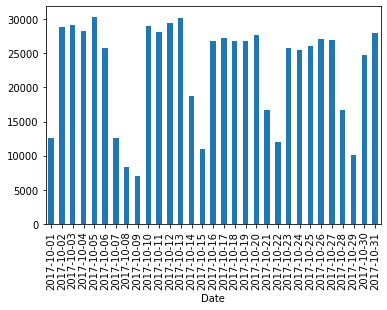

In [7]:
num_passengers['Bus'].plot(kind='bar')

Additionally, we can see that the most frequently used bus route is 701. Note that the routes servicing peak demand in certain areas (routes 8 and 13) are infrequently used.

&lt;AxesSubplot:xlabel=&#39;Route&#39;&gt;

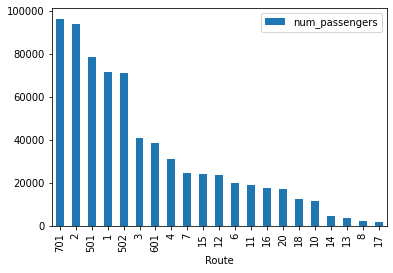

In [8]:
# Number of busses allocated to each route
route_passengers = df.groupby('Route').size().reset_index(name='num_passengers')
route_passengers = route_passengers.sort_values(by='num_passengers',ascending=False) 
route_passengers.plot(kind='bar', x='Route',y='num_passengers')


# Question 2 - Redundancy

In [9]:
import seaborn as sns

In [10]:
routes = clean[['Route','Latitude','Longitude']]
unique_routes = routes.Route.unique()
cols = []
for x in unique_routes:
    cols.append(f"{x}_lat")
    cols.append(f"{x}_lon")
split_routes = pd.DataFrame(columns = cols)

In [11]:
for x in unique_routes:
    lat = np.asarray(routes.loc[routes.Route==x].Latitude.tolist())
    lon = np.asarray(routes.loc[routes.Route==x].Longitude.tolist())
    split_routes[f"{x}_lat"] = pd.Series(lat)
    split_routes[f"{x}_lon"] = pd.Series(lon)
    

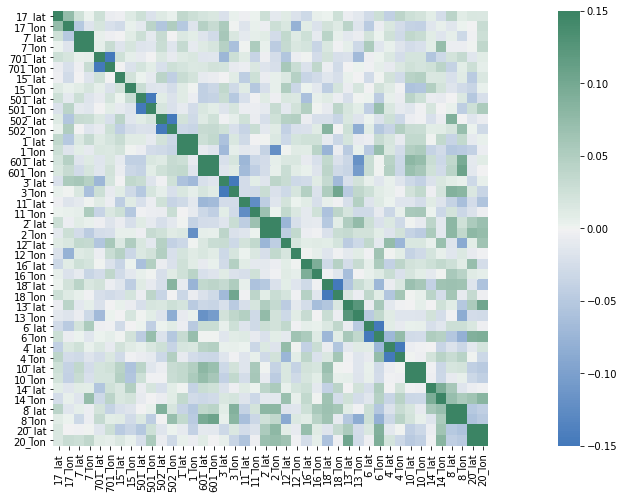

In [12]:
# normalize dataframe using min-max
normalized_split_routes=(split_routes-split_routes.min())/(split_routes.max()-split_routes.min())

# get correlation matrix
corr = normalized_split_routes.corr()
fig, ax = plt.subplots(figsize=(25,8)) 
ax = sns.heatmap(
    corr, 
    vmin=-.15, vmax=.15,
    square=True,
    cmap=sns.diverging_palette(250,150,n=200),
    ax=ax
)

# Question 4 - Interesting Observations

Here we can see that the routes servicing peak demand are active in the early parts of the morning. This is likely a process already implemented by the city to better plan their public transit system.

&lt;AxesSubplot:xlabel=&#39;Hour&#39;&gt;

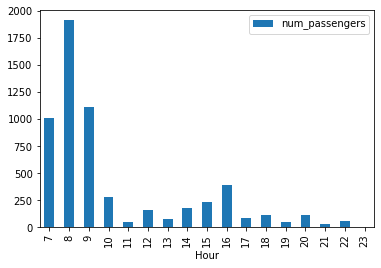

In [42]:
 Times = pd.to_datetime(clean['Time'])
 clean['Hour'] = Times.dt.hour
 peak_demand = clean.loc[(clean.Route == 13) | (clean.Route == 8)]
 peak_demand = peak_demand.groupby('Hour').size().reset_index(name='num_passengers')
 peak_demand.plot(kind='bar', x='Hour',y='num_passengers')